# Clustering Pengguna "Aplikasi Bibit Reksadana" dengan Metode K-Means

by KELOMPOK 5: Efinoprianti-60200118024, Selvi Anggraeni-60200118035, Syamsul Rijal-60200118067

Dataset diperoleh dari hasil pengumpulan sendiri pada review pengguna aplikasi Bibit Reksadana dengan total data 100 dan 2 kolom yaitu label dan review.

**Importing Important Libraries**

In [3]:
pip install os-win

  Found existing installation: dnspython 2.1.0
    Uninstalling dnspython-2.1.0:
      Successfully uninstalled dnspython-2.1.0
  Found existing installation: importlib-metadata 0.23
    Uninstalling importlib-metadata-0.23:
      Successfully uninstalled importlib-metadata-0.23
  Found existing installation: packaging 19.2
    Uninstalling packaging-19.2:
      Successfully uninstalled packaging-19.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install os-sys

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement text-editor (from os-sys) (from versions: none)
ERROR: No matching distribution found for text-editor (from os-sys)


In [ ]:
# for importing dataset
import numpy as np
import pandas as pd
    
# for performing text clustering    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

**Importing the Dataset**

In [11]:
# importing the csv file
data = pd.read_csv('dataset.csv')

# getting the shape
data.shape

(99, 2)

In [12]:
data.head()

,review,label
0,Seorang S2 pasti penjelasanya selalu mengunaka...,positif
1,Pencairan dana lama kita lagi butuh tapi manaj...,negatif
2,berguna bagi seseorang yang ingin investati,positif
3,biayanya tergolong murah,positif
4,memiliki fitur yang menarik,positif


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
review    99 non-null object
 label    98 non-null object
dtypes: object(2)
memory usage: 1.7+ KB


In [14]:
# assigning names to the columns

data.columns = ['review', 'label']

# checking the names of the columns
data.columns

Index(['review', 'label'], dtype='object')

In [15]:
# getting the length of the text as another feature

data['Length'] = data['review'].apply(len)

In [16]:
# describing the dataset

data.groupby('Length').describe().head(20)

review                                                label         \
        count unique                                top freq count unique   
Length                                                                      
12          1      1                       ini penipuan    1     1      1   
13          5      5                      aplikasi baru    1     5      2   
14          2      2                     mari investasi    1     2      1   
15          1      1                    uangnya sedikit    1     1      1   
16          3      3                   mungkin membantu    1     3      1   
17          2      2                  aplikasinya asing    1     2      2   
18          3      3                 selalu ada kejutan    1     3      2   
19          3      3                keuntungannya nyata    1     3      2   
22          1      1             proses pencairan lemot    1     1      1   
23          4      4            investasinya terjangkau    1     4      1   
24          7      7           cara ambil uangnya rumit    1     7      2   
25          1      1          aplikasinya sedikit jelek    1     1      1   
26          2      2         apa benar akan menjanjikan    1     2      1   
27          2      2        memiliki fitur yang menarik    1     2      2   
28          2      2       benar mendapatkan keuntungan    1     2      1   
29          4      4      bisa untung banyak atau tidak    1     4      1   
30          3      3     keuntungannya benar atau tidak    1     3      1   
31          1      1    aplikasi mudah sekali digunakan    1     1      1   
32          3      3   tidak bisa kalau tidak punya ktp    1     3      1   
33          2      2  jual beli reksa dana sangat mudah    1     2      2   

                       
             top freq  
Length                 
12       negatif    1  
13       positif    3  
14       positif    2  
15       positif    1  
16       positif    3  
17       positif    1  
18       positif    2  
19       positif    2  
22       negatif    1  
23       positif    4  
24       positif    4  
25       negatif    1  
26       positif    2  
27       positif    1  
28       positif    2  
29       positif    4  
30       positif    3  
31       positif    1  
32       positif    3  
33       positif    1

In [17]:
# looking at the head of the data

data.head()

,review,label,Length
0,Seorang S2 pasti penjelasanya selalu mengunaka...,positif,99
1,Pencairan dana lama kita lagi butuh tapi manaj...,negatif,75
2,berguna bagi seseorang yang ingin investati,positif,43
3,biayanya tergolong murah,positif,24
4,memiliki fitur yang menarik,positif,27


## Data Visualization

Text(0.5, 1.0, 'Distribusi Panjang atas Teks')

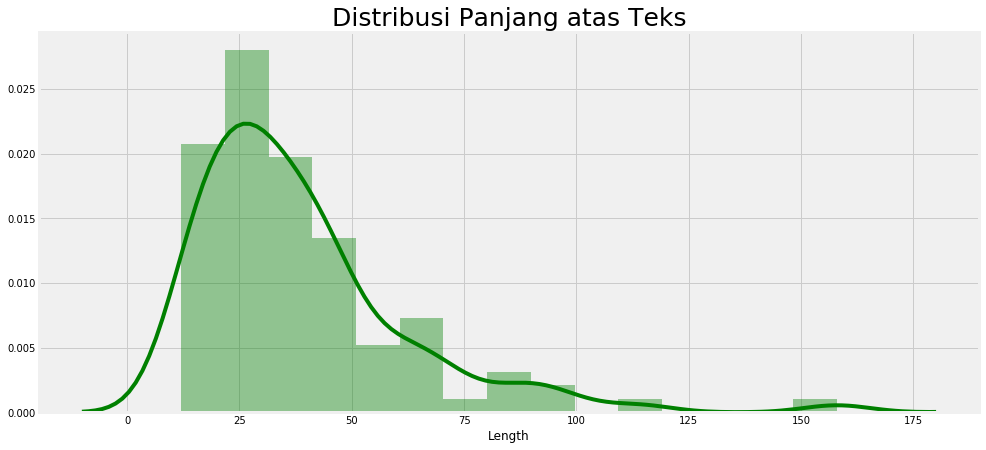

In [26]:
# looking at the distribution of length of the different texts

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(data['Length'], color = 'green')
plt.title('Distribusi Panjang atas Teks', fontsize = 25)

Text(0.5, 1.0, 'WordCloud ')

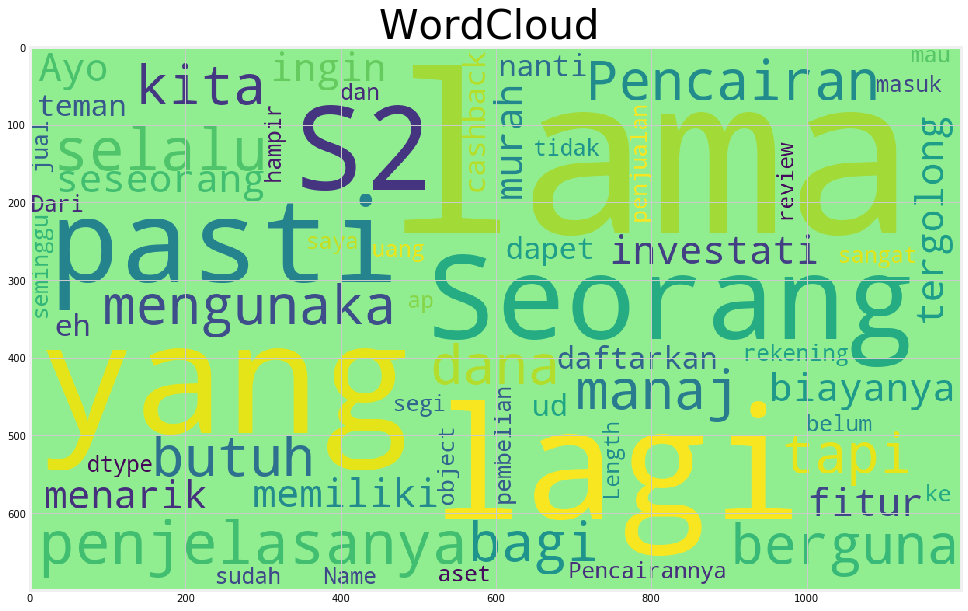

In [27]:
# wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightgreen',
                      width = 1200,
                      height = 700).generate(str(data['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 40)

### 20 KATA TERBANYAK - HEAD

Text(0.5, 1.0, '20 Frekuensi Kata Terbanyak')

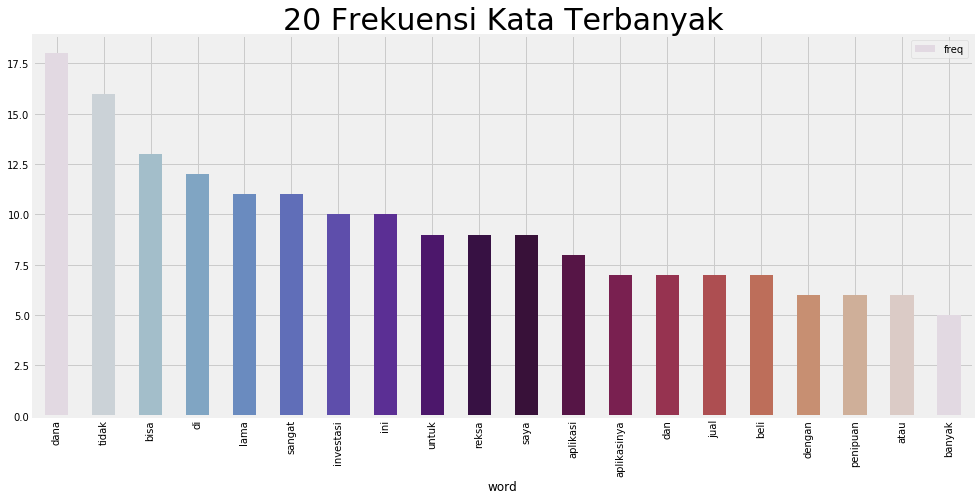

In [33]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['review'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Kata Yang Paling Sering Muncul - Top 20", fontsize = 30)

### 20 KATA TERBANYAK - TAIL

Text(0.5, 1.0, 'Kata Yang Paling Sering Muncul - Top 20')

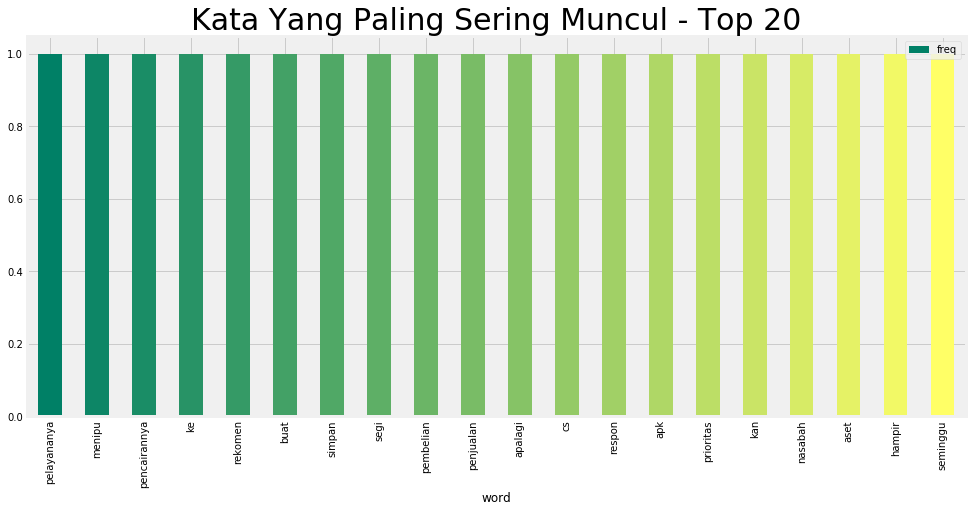

In [37]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['review'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Kata Yang Paling Sering Muncul - Top 20", fontsize = 30)

## Data Preprocessing

In [41]:
x = data['review']

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stopwords = StopWordRemoverFactory().get_stop_words() 
stemmer = StemmerFactory().create_stemmer()

import re 

def text_preprocess(text, stemmer, stopwords):
    x = text.str.replace(r'\W',' ')
    x = x.str.replace(r'\s+',' ')
    x = x.str.lower()
    x = x.apply(lambda x: ' '.join([stemmer.stem(item) for item in x.split() if item not in stopwords]))
    return x

data['processed_text'] = text_preprocess(x, stemmer, stopwords)

## Tokenizing

In [44]:
import nltk
nltk.download()

wordfreq = {}
for sentence in data['processed_text']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

import heapq
most_freq = heapq.nlargest(300, wordfreq, key=wordfreq.get)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [45]:
wordfreq = {token: freq for token, freq in sorted(wordfreq.items(), key=lambda item: item[1], reverse=True)} 
wordfreq

{'dana': 18,
 'aplikasi': 15,
 'lama': 11,
 'investasi': 11,
 'sangat': 11,
 'reksa': 9,
 'jual': 8,
 'beli': 8,
 'tipu': 7,
 'untung': 7,
 'banyak': 5,
 'benar': 5,
 'masuk': 5,
 'sekali': 4,
 'guna': 4,
 'mudah': 4,
 'rekening': 4,
 'baru': 4,
 'coba': 4,
 'uang': 4,
 'mau': 4,
 'lebih': 3,
 'cair': 3,
 'nya': 3,
 'fitur': 3,
 'tarik': 3,
 'investor': 3,
 'cara': 3,
 'awal': 3,
 'bantu': 3,
 'apa': 3,
 'ayo': 3,
 'metode': 3,
 'batas': 3,
 'cashback': 3,
 'proses': 3,
 'udah': 3,
 'hari': 3,
 'dapet': 3,
 'orang': 2,
 'selalu': 2,
 'memang': 2,
 'erti': 2,
 'butuh': 2,
 'rumit': 2,
 'asing': 2,
 'sukses': 2,
 'goblok': 2,
 'download': 2,
 'daftar': 2,
 'nyata': 2,
 'store': 2,
 'buka': 2,
 'bayar': 2,
 'sulit': 2,
 'dapat': 2,
 'lalu': 2,
 'percaya': 2,
 'sedikit': 2,
 'jelek': 2,
 'kurang': 2,
 'terimakasih': 2,
 'ktp': 2,
 'per': 2,
 'minggu': 2,
 'jangan': 2,
 'baik': 2,
 'keren': 2,
 'bibit': 2,
 'klik': 2,
 'register': 2,
 'banget': 2,
 'aja': 2,
 'gak': 2,
 'verifikasi': 2,
 't

## TF-IF

In [43]:
# vectorizing the data using Tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features = 2000)
X = vectorizer.fit_transform(data['review'])

# getting the shape of X
print("Shape of X :", X.shape)

Shape of X : (99, 299)


In [46]:
word_idf_values = {}
for token in most_freq:
    doc_containing_word = 0
    for document in data['processed_text']:
        if token in nltk.word_tokenize(document):
            doc_containing_word += 1
    word_idf_values[token] = np.log(len(x)/(1 + doc_containing_word))


word_tf_values = {}
for token in most_freq:
    sent_tf_vector = []
    for document in data['processed_text']:
        doc_freq = 0
        for word in nltk.word_tokenize(document):
            if token == word:
                  doc_freq += 1
        word_tf = doc_freq/len(nltk.word_tokenize(document))
        sent_tf_vector.append(word_tf)
    word_tf_values[token] = sent_tf_vector
    
tfidf_values = []
for token in word_tf_values.keys():
    tfidf_sentences = []
    for tf_sentence in word_tf_values[token]:
        tf_idf_score = tf_sentence * word_idf_values[token]
        tfidf_sentences.append(tf_idf_score)
    tfidf_values.append(tfidf_sentences)

tf_idf_model = np.asarray(tfidf_values)
tf_idf_model = np.transpose(tf_idf_model)

print(tf_idf_model)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.18340899 0.         0.26643281 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.26643281 ... 0.         0.         0.        ]
 [0.         0.         0.47957905 ... 0.26013151 0.         0.        ]
 [0.         0.         0.         ... 0.         0.55742467 0.55742467]]


## Clustering

In [47]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [ ]:
print("Istilah teratas per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")


# Mencoba melakukan prediksi berdasarkan model yang dibuat :
Y = vectorizer.transform(["Pencairan dana lama kita lagi butuh tapi manajer investasi nya lelet sekali"])
prediction = model.predict(Y)
print("Hasil Cluster :", prediction)

In [53]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [54]:
print("Istilah teratas per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")


# Mencoba melakukan prediksi berdasarkan model yang dibuat :
Y = vectorizer.transform(["Pencairan dana lama kita lagi butuh tapi manajer investasi nya lelet sekali"])
prediction = model.predict(Y)
print("Hasil Cluster [0 untuk negatif - 1 untuk positif] :", prediction)

Istilah teratas per cluster:
Cluster 0:
 aplikasinya
 dengan
 asing
 caranya
 metode
 sedikit
 rumit
 uangnya
 ingin
 pembayarannya
Cluster 1:
 ini
 benar
 lama
 penipuan
 tidak
 keuntungan
 banyak
 atau
 pencairannya
 harus
Cluster 2:
 bisa
 untuk
 tidak
 investasi
 mari
 mencoba
 ktp
 menggunakan
 atau
 di
Cluster 3:
 dana
 sangat
 reksa
 beli
 jual
 aplikasi
 membantu
 mudah
 penipuan
 dan
Cluster 4:
 di
 lebih
 bibi
 setting
 ipot
 resa
 fitur
 ada
 bibit
 langsung


Prediction
Hasil Cluster [0 untuk negatif - 1 untuk positif] : [1]


# SEKIAN